# <font color='blue'> Facebook </font> Live Sellers in Thailand

by Bernardo Augusto

Link of the dataset: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand#

## Notebook - Table of Content

1. [**Description of the dataset**](#1.-Description-of-the-dataset)

    1.1. [**Abstract**](#1.1.-Abstract)  
    
    1.2. [**Source**](#1.2.-Source)
    
    1.3. [**Attribute Information**](#1.3.-Attribute-Information)


2. [**Importing necessary Libraries**](#2.-Importing-necessary-Libraries)  


3. [**Loading Data**](#3.-Loading-Data)


4. [**Data Cleaning**](#4.-Data-Cleaning)  


5. [**Exploratory Analysis**](#5.-Exploratory-Analysis)  

    5.1. [**Distribution of Posts x Status Type**](#5.1.-Distribution-of-Posts-x-Status-Type)  
    
    5.2. [**Distribution of Posts x Hour**](#5.2.-Distribution-of-Posts-x-Hour)
    
    5.3. [**Distribution of Posts x Day of Month**](#5.3.-Distribution-of-Posts-x-Day-of-Month) 
    
    5.4. [**Distribution of Posts x Day of Month**](#5.4.-Distribution-of-Posts-x-Day-of-Month)
    
    5.5. [**Heat Map**](#5.5.-Heat-Map)
    
    5.6. [**Drop the Correlated Features**](#5.6.-Drop-the-Correlated-Features) 
    
    5.7. [**Confusion Matrix after Dropping the Correlated Features**](#5.7.-Confusion-Matrix-after-Dropping-the-Correlated-Features)
    
    
6. [**Best Algorithms**](#6.-Best-Algorithms)  
    
    6.1. [**Silhouette Method**](#6.1.-Silhouette-Method)
    
    6.2. [**K-Means**](#6.2-K-Means)
    
    6.3. [**Agglomerative Clustering**](#6.3-Agglomerative-Clustering)
    
    6.4. [**Mini-Batch K-Means**](#6.4-Mini-Batch-K-Means)
    
    6.5. [**BIRCH**](#6.5.-BIRCH)


7. [**Other Algorithms**](#7.-Other-Algorithms)   
    
    7.1. [**Affinity Propagation**](#7.1.-Affinity-Propagation)
    
    7.2 [**DBSCAN**](#7.2.-DBSCAN)
    
    7.3 [**Mean Shif**](#7.3.-Mean-Shif)
    
    7.4 [**OPTICS**](#7.4.-OPTICS)


8. [**Evaluation of the models**](#8.-Evaluation-of-the-Models)  

    8.1. [**Algorithm Chosen - K-Means**](#8.1.-Algorithm-Chosen---K-Means)  
    
    8.2. [**Distribution of Clusters**](#8.2.-Distribution-of-Clusters)  
    
    8.3. [**Undersampling**](#8.3.-Undersampling)  
    
    8.4. [**Cluster Distribution (after undersampling)**](#8.4.-Cluster-Distribution-(after-undersampling))  
    
    8.5. [**Cluster Profile Based on Shares And Likes**](#8.5.-Cluster's-Profile-Based-on-Shares-And-Likes)  
    
    8.6. [**Cluster's Profile Based on Type Status And Likes**](#8.6.-Cluster's-Profile-Based-on-Type-Status-And-Likes)
    
    8.7. [**Cluster's Profile Based on Likes And Hour**](#8.7.-Cluster's-Profile-Based-on-Likes-And-Hour)
    
    8.8. [**Cluster's Profile Based on Likes And Month**](#8.8.-Cluster's-Profile-Based-on-Likes-And-Month)
    
    8.9. [**Cluster's Profile Based on Interations And Likes**](#8.9.-Cluster's-Profile-Based-on-Interations-And-Likes)
    
    8.10. [**Cluster's Profile Based on Hour And Interations**](#8.10.-Cluster's-Profile-Based-on-Hour-And-Interations)
    
    
9. [**Conclusion**](#9.-Conclusion)

## 1. Description of the dataset

#### 1.1. Abstract
* **Facebook pages** of **10 Thai fashion and cosmetics retail sellers**

* **Posts** of a **different nature**
    * **video** 
    * **photos**
    * **statuses**
    * **links**
    
    
* **Engagement metrics** consist of:
    * **comments**
    * **shares**
    * **reactions**

| Data Set Characteristics | Attribute Characteristics | Associated Tasks | Number of Instances | Number of Attributes | Missing Values | Area | Date Donated | Number of Web Hits
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Multivariate | Integer | Clustering | 7051 | 12 | N/A | Business | 2019-04-22 | 54516 |

#### 1.2. Source 
* Nassim Dehouche, Mahidol University International College, nassim.deh '@' mahidol.edu

#### 1.3. Data Set Information

* The **variability of consumer engagement** is **analysed** through a **Principal Component Analysis**, highlighting the changes induced by the use of Facebook Live 
* The **seasonal component** is **analysed** through a study of the averages of the **different engagement metrics for different time-frames** (hourly, daily and monthly)
* Finally, we **identify statistical outlier posts, that are qualitatively analyzed further, in terms of their selling approach and activities**

#### 1.4. Attribute Information
* **status_id** - unique identifier of the post
* **status_type** - type of the post 
* **status_published** - date and time of when the post was post
* **num_reactions** - number of likes, loves, wows, hahas, sads, and angrys
* **num_comments** - number of comments
* **num_shares** - number of shares 
* **num_likes** - number of likes
* **num_loves** - number of loves 
* **num_wows** - number of wows 
* **num_hahas** - number of hahas 
* **num_sads** - number of sads 
* **num_angrys** - number of angrys 

## 2. Importing necessary Libraries

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as pl
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS

## 3. Loading Data

In [2]:
# Control delimiters, rows, column names with read_csv
data = pd.read_csv('/Users/bernardoaugusto/Downloads/Live_20210128.csv')

* Check the **shape** of the data loaded 

In [3]:
data.shape

(7050, 16)

* **First 5 rows** of the Dataframe

In [4]:
data.head()

status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1           0      NaN      NaN      NaN      NaN  
2           0      NaN      NaN      NaN      NaN  
3           0      NaN      NaN      NaN      NaN  
4           0      NaN      NaN      NaN      NaN

## 4. Data Cleaning 

* Discover the amount of **data missing**

In [5]:
missing = data.isnull().sum()

print(missing)

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


* Get all the features columns **except the last 4 collumns**

In [6]:
features = list(data.columns)[:-4]

df = data[features]

* **Check** if there is any more **missing data**

In [7]:
missing = df.isnull().sum()
print(missing)

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


* **Shape** obtained after **dropping last 4 collumns**

In [8]:
df.shape

(7050, 12)

In [9]:
# show the dataset
df.head()

status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0         262        432         92         3          1         1           0  
1           0        150          0         0          0         0           0  
2          57        204         21         1          1         0           0  
3           0        111          0         0          0         0           0  
4           0        204          9         0          0         0           0

* Check the **dataframe informations** like: 
    * **Collumn name**
    * **Number of rows**
    * **Data type**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


* Turn the **status_published** feature into **datetime**

In [11]:
df['status_published'] = pd.to_datetime(df['status_published'])

<ipython-input-11-65768285ac13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_published'] = pd.to_datetime(df['status_published'])


In [12]:
df

status_id status_type    status_published  num_reactions  num_comments  \
0             1       video 2018-04-22 06:00:00            529           512   
1             2       photo 2018-04-21 22:45:00            150             0   
2             3       video 2018-04-21 06:17:00            227           236   
3             4       photo 2018-04-21 02:29:00            111             0   
4             5       photo 2018-04-18 03:22:00            213             0   
...         ...         ...                 ...            ...           ...   
7045       7046       photo 2016-09-24 02:58:00             89             0   
7046       7047       photo 2016-09-23 11:19:00             16             0   
7047       7048       photo 2016-09-21 23:03:00              2             0   
7048       7049       photo 2016-09-20 00:43:00            351            12   
7049       7050       photo 2016-09-10 10:30:00             17             0   

      num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0            262        432         92         3          1         1   
1              0        150          0         0          0         0   
2             57        204         21         1          1         0   
3              0        111          0         0          0         0   
4              0        204          9         0          0         0   
...          ...        ...        ...       ...        ...       ...   
7045           0         89          0         0          0         0   
7046           0         14          1         0          1         0   
7047           0          1          1         0          0         0   
7048          22        349          2         0          0         0   
7049           0         17          0         0          0         0   

      num_angrys  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
7045           0  
7046           0  
7047           0  
7048           0  
7049           0  

[7050 rows x 12 columns]

* Creation of **4 new features**: 
    * **year**
    * **month**
    * **day**
    * **hour**

In [13]:
df['year'] = df['status_published'].dt.year
df['month'] = df['status_published'].dt.month
df['day'] = df['status_published'].dt.day
df['hour'] = df['status_published'].dt.hour

<ipython-input-13-428617c1a146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['status_published'].dt.year
<ipython-input-13-428617c1a146>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['status_published'].dt.month
<ipython-input-13-428617c1a146>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

* **Drop** the **status_id** collumn since it is **not** gonna be **used** for **analysis or for clustering**

In [20]:
df = df.drop(['status_id'], axis=1)

In [21]:
df

status_type    status_published  num_reactions  num_comments  num_shares  \
0          video 2018-04-22 06:00:00            529           512         262   
1          photo 2018-04-21 22:45:00            150             0           0   
2          video 2018-04-21 06:17:00            227           236          57   
3          photo 2018-04-21 02:29:00            111             0           0   
4          photo 2018-04-18 03:22:00            213             0           0   
...          ...                 ...            ...           ...         ...   
7045       photo 2016-09-24 02:58:00             89             0           0   
7046       photo 2016-09-23 11:19:00             16             0           0   
7047       photo 2016-09-21 23:03:00              2             0           0   
7048       photo 2016-09-20 00:43:00            351            12          22   
7049       photo 2016-09-10 10:30:00             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  year  \
0           432         92         3          1         1           0  2018   
1           150          0         0          0         0           0  2018   
2           204         21         1          1         0           0  2018   
3           111          0         0          0         0           0  2018   
4           204          9         0          0         0           0  2018   
...         ...        ...       ...        ...       ...         ...   ...   
7045         89          0         0          0         0           0  2016   
7046         14          1         0          1         0           0  2016   
7047          1          1         0          0         0           0  2016   
7048        349          2         0          0         0           0  2016   
7049         17          0         0          0         0           0  2016   

      month  day  hour  
0         4   22     6  
1         4   21    22  
2         4   21     6  
3         4   21     2  
4         4   18     3  
...     ...  ...   ...  
7045      9   24     2  
7046      9   23    11  
7047      9   21    23  
7048      9   20     0  
7049      9   10    10  

[7050 rows x 15 columns]

## 5. Exploratory Analysis

#### 5.1. Distribution of Posts x Status Type

* **Photo** posts is the **predominant class** followed by video 

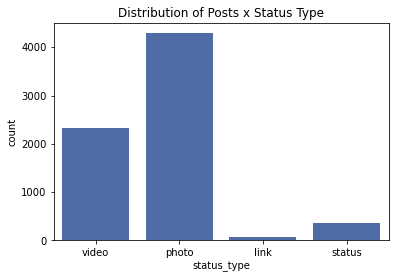

In [22]:
pal = ["#4267B2"]
pl = sns.countplot(x=df["status_type"], palette= pal)
pl.set_title("Distribution of Posts x Status Type")
plt.show()

#### 5.2. Distribution of Posts x Hour

* **Posts** **don't** usually are **posted** around **13:00 and 19:00**

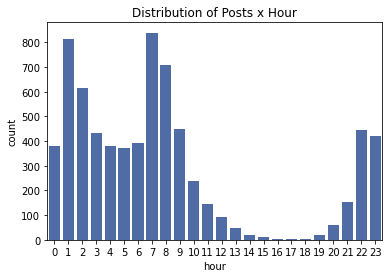

In [23]:
pal = ["#4267B2"]
pl = sns.countplot(x=df["hour"], palette= pal)
pl.set_title("Distribution of Posts x Hour")
plt.show()

#### 5.3. Distribution of Posts x Day of Month

* **Posts** are **fairly distributed** but in **day 31 of the month have a bit less**
* Maybe because not all month have 31 days

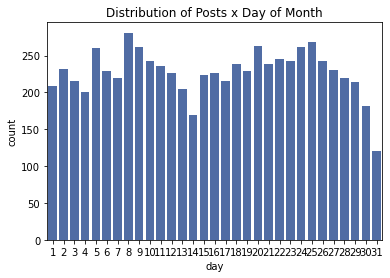

In [24]:
pal = ["#4267B2"]
pl = sns.countplot(x=df["day"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

#### 5.4. Distribution of Posts x Day of Month

* In the **month 7** usually there is **less posts** 
* Besides that posts are fairly distributed

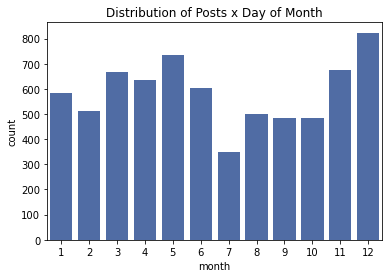

In [25]:
pal = ["#4267B2"]
pl = sns.countplot(x=df["month"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

#### 5.5. Distribution of Posts x Day of Month

* Years **2017 and 2018** have the **most** amount of **posts**
* Maybe because it was identified that posts can affect sales

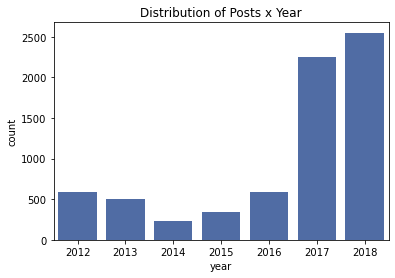

In [22]:
pal = ["#4267B2"]
pl = sns.countplot(x=df["year"], palette= pal)
pl.set_title("Distribution of Posts x Year")
plt.show()

#### 5.5. Heat Map

* **Heat map** allows us to see if there is **correlation** between **features**

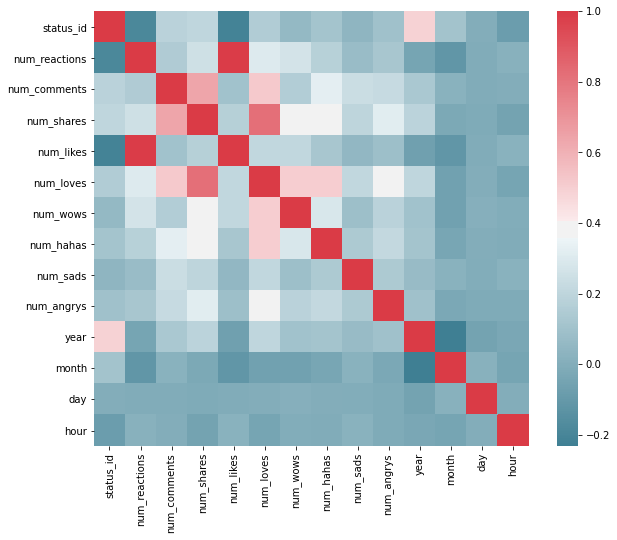

In [23]:
# heatmap to show the relational between features
f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### 5.6. Drop the Correlated Features

* **Correlated** features were:
    * **num_reactions**
    * **num_loves**
    * **year**
    * **num_comments**

In [24]:
df = df.drop(['num_reactions', 'num_loves', 'year', 'num_comments'], axis=1)

#### 5.7. Heat Map after Dropping the Correlated Features

* Features now are not super correlated 

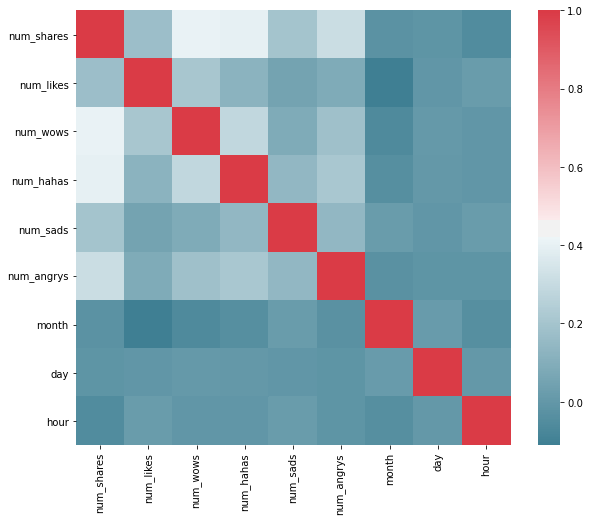

In [25]:
# heatmap to show the relational between features
f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

* **Dictionary** with the **key as type of the post** and **value as dummy** so the values can be used in the clusters algorithms.

In [26]:
s_type = {'video': 1,'photo': 2, 'status': 3,'link': 4}

* **Transform** the **post type** into **numbers** so we can analyse them via cluster

In [27]:
df.status_type = [s_type[item] for item in df.status_type]

* **Drop** the **status_published**

In [28]:
df = df.drop('status_published', axis=1)

In [29]:
df.head(10)

status_type  num_shares  num_likes  num_wows  num_hahas  num_sads  \
0            1         262        432         3          1         1   
1            2           0        150         0          0         0   
2            1          57        204         1          1         0   
3            2           0        111         0          0         0   
4            2           0        204         0          0         0   
5            2           0        211         1          0         0   
6            1          72        418        10          2         0   
7            1          53        260         1          1         0   
8            2           0        198         0          0         0   
9            2           1        167         0          0         0   

   num_angrys  month  day  hour  
0           0      4   22     6  
1           0      4   21    22  
2           0      4   21     6  
3           0      4   21     2  
4           0      4   18     3  
5           0      4   18     2  
6           3      4   18     0  
7           1      4   17     7  
8           0      4   17     3  
9           0      4   11     4

## 6. Best Algorithms

#### 6.1. Silhouette Method

* This **method allow** us to decide what the **best number of clusters are**
* **2 cluster** is the number of cluster with the **highest score (85%)**
* For that reason it is the decided number of clusters

In [30]:
# choosing the best number of clusters using the silhouette score
range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8534671889199728)
For n_clusters = 3, silhouette score is 0.8056051502662949)
For n_clusters = 4, silhouette score is 0.6284172846007556)
For n_clusters = 5, silhouette score is 0.6297657710495062)
For n_clusters = 6, silhouette score is 0.6310532605310075)
For n_clusters = 7, silhouette score is 0.677439387139777)
For n_clusters = 8, silhouette score is 0.6472581026856694)
For n_clusters = 9, silhouette score is 0.6358861373680589)


#### 6.2. K-Means

* In this algorithm the **Clusters are very well delimited**
* For this reason it is a **good algorithm**

In [31]:
# k-means clustering
clustering_kmeans = KMeans(n_clusters=2)
df['Clusters'] = clustering_kmeans.fit_predict(df)

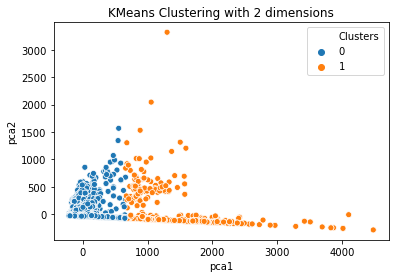

In [32]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
pal = ["#29487D", "#9CB2CE"]

sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()

#### 6.3. Agglomerative Clustering

* This algorithm like the above, also have the **Clusters well delimited**
* For this reason it is a **good algorithm**

In [33]:
# agglomerative clustering
clustering_kmeans = AgglomerativeClustering(n_clusters=2)
df['Clusters'] = clustering_kmeans.fit_predict(df)

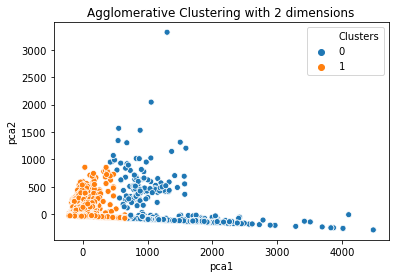

In [34]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results, palette=pal)
plt.title('Agglomerative Clustering with 2 dimensions')
plt.show()

#### 6.4. Mini-Batch K-Means

* This algorithm also have the **Clusters well delimited**
* For this reason it is a **good algorithm**

In [35]:
# mini-batch k-means clustering
clustering_kmeans = MiniBatchKMeans(n_clusters=2)
df['Clusters'] = clustering_kmeans.fit_predict(df)

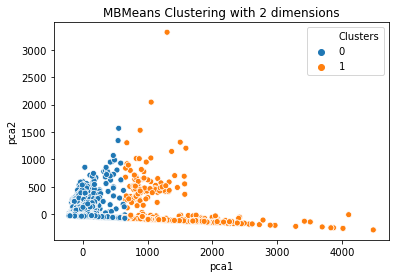

In [36]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results, palette=pal)
plt.title('MBMeans Clustering with 2 dimensions')
plt.show()

#### 6.5. BIRCH

* The algorithm identified **3 clusters**
* And these are **well delimited**
* can be considered **one of the best**

In [40]:
# BIRCH clustering
clustering_kmeans = Birch()
df['Clusters'] = clustering_kmeans.fit_predict(df)

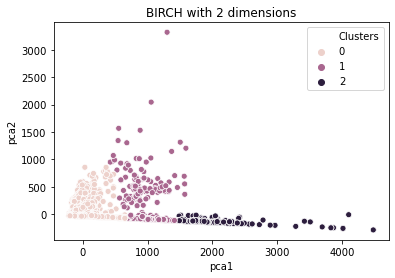

In [41]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results)
plt.title('BIRCH with 2 dimensions')
plt.show()

## 7. Other Algorithms
These algorithms dont perform as well as the shown previously

#### 7.1. Affinity Propagation

* This **algorithm doesn't** have the **cluster well delimited**
* So we can conclude that **is not good for this problem**

In [37]:
# Affinity Propagation
clustering_kmeans = AffinityPropagation(damping=0.9)
df['Clusters'] = clustering_kmeans.fit_predict(df)

/Users/bernardoaugusto/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


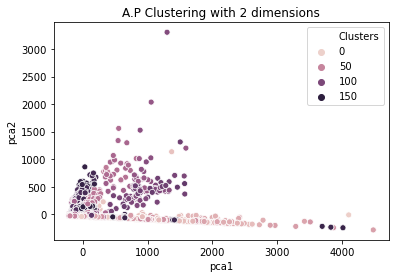

In [38]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results)
plt.title('A.P Clustering with 2 dimensions')
plt.show()

#### 7.2. DBSCAN

* The algorithm identified **2 clusters**
* But these **can't distinguished**
* For this reason is **not a good algorithm for the problem**

In [43]:
# DBSCAN clustering
clustering_kmeans = DBSCAN()
df['Clusters'] = clustering_kmeans.fit_predict(df)

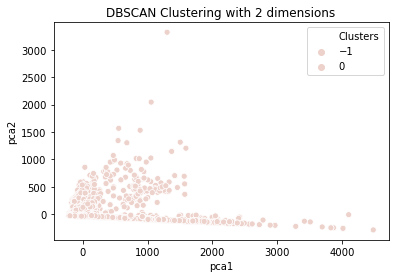

In [44]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results)
plt.title('DBSCAN Clustering with 2 dimensions')
plt.show()

#### 7.3. Mean Shif

* The algorithm identified **4 cluster**
* But the cluster **aren't well delimited** 
* For that reason it is **not a good algorithm for this problem** 

In [46]:
# mean shift clustering
clustering_kmeans = MeanShift()
df['Clusters'] = clustering_kmeans.fit_predict(df)

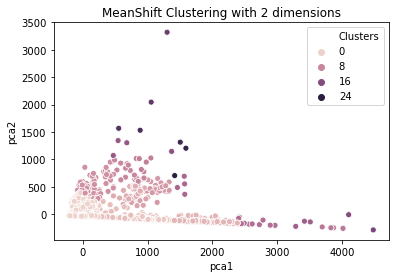

In [47]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results)
plt.title('MeanShift Clustering with 2 dimensions')
plt.show()

#### 7.4. OPTICS

* The algorithm **doesn't** have the **cluster well delimited** 
* For that reason we can conclude that **is not good for this problem**

In [49]:
# OPTICS clustering
clustering_kmeans = OPTICS()
df['Clusters'] = clustering_kmeans.fit_predict(df)

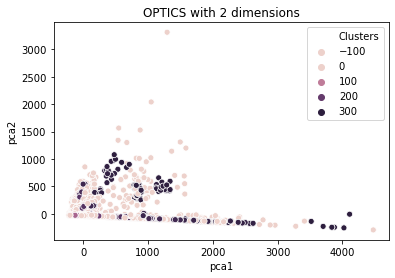

In [50]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results)
plt.title('OPTICS with 2 dimensions')
plt.show()

## 8. Evaluation of the models

* Since this is an **unsupervised clustering**. We do **not have** a **tagged feature** to **evaluate the score of our model** 
* The **purpose** of this section is to **study the patterns** in the clusters formed and *+determine the nature** of the clusters' patterns.
* For that, we will be having a **look at the data in light of clusters via exploratory data analysis and drawing conclusions**

#### 8.1. Algorithm Chosen - K Means

* After some thought, it was decided that **K Means should be used**
* Because it only contains **2 clusters** so it's **easiers to interpreter the results**

In [58]:
# k-means clustering
clustering_kmeans = KMeans(n_clusters=2)
df['Clusters'] = clustering_kmeans.fit_predict(df)

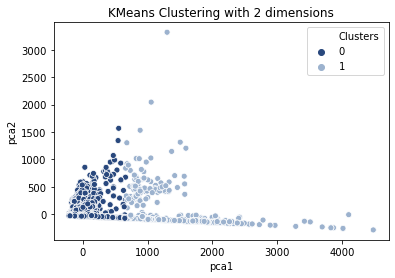

In [91]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

pal = ["#29487D", "#9CB2CE"]
sns.scatterplot(x="pca1", y="pca2", hue=df['Clusters'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()

#### 8.2. Distribution of Clusters

* Can be observed that the **clusters aren't fairly distributed**

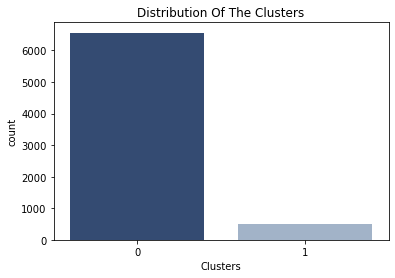

In [88]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

* **Number of rows in each cluster**

In [64]:
df['Clusters'].value_counts()

0    6562
1     488
Name: Clusters, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   status_type  7050 non-null   int64
 1   num_shares   7050 non-null   int64
 2   num_likes    7050 non-null   int64
 3   num_wows     7050 non-null   int64
 4   num_hahas    7050 non-null   int64
 5   num_sads     7050 non-null   int64
 6   num_angrys   7050 non-null   int64
 7   month        7050 non-null   int64
 8   day          7050 non-null   int64
 9   hour         7050 non-null   int64
 10  Clusters     7050 non-null   int32
dtypes: int32(1), int64(10)
memory usage: 578.4 KB


In [66]:
df['Clusters'].value_counts(normalize=True)

0    0.93078
1    0.06922
Name: Clusters, dtype: float64

* There is **two techniques** that are usefull to **fix** distribution of **unbalanced classes**:
    * **Oversampling**
    * **Undersampling**


#### 8.3. Undersampling

* **Function for undersampling**

In [68]:
def downsample(df, label_col_name):
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

* It was created a **new dataframe after aplying the undersampling**

In [69]:
df_us = downsample(df, 'Clusters')

In [70]:
df_us

status_type  num_shares  num_likes  num_wows  num_hahas  num_sads  \
0              2           0         34         0          0         0   
1              1         191        127         1          1         0   
2              2           0        187         1          0         0   
3              2           5        197         3          0         0   
4              2           0         15         0          0         0   
..           ...         ...        ...       ...        ...       ...   
971            2           0       2382         0          0         0   
972            1        1101        981         8         14         1   
973            2           0       1220         0          0         0   
974            1           2        893         0          0         0   
975            3           0       2177         0          0         0   

     num_angrys  month  day  hour  Clusters  
0             0      2    3     6         0  
1             0      3    8     7         0  
2             0      4   17    21         0  
3             0      2   12    11         0  
4             0      5   30     7         0  
..          ...    ...  ...   ...       ...  
971           0      6   12     9         1  
972           1      6    9     8         1  
973           0      3    7    22         1  
974           0      4   28     5         1  
975           0     10    2     9         1  

[976 rows x 11 columns]

* **After** the use of this **technique** the **clusters** are **fairly distributed**

In [71]:
df_us['Clusters'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Clusters, dtype: float64

#### 8.4. Cluster Distribution (after undersampling)

* Now are **fairly distributed**

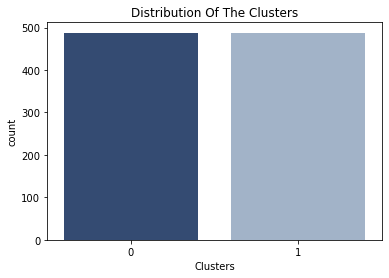

In [92]:
pl = sns.countplot(x=df_us["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

#### 8.5. Cluster's Profile Based on Shares And Likes 

* We can see that the **sellers of the cluster 0 have less shares and less likes than the sellers of the cluster 1**

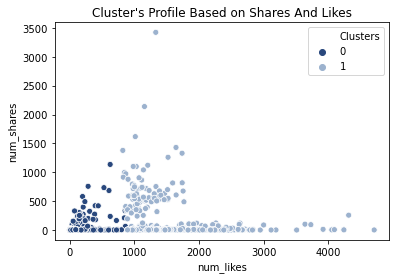

In [93]:
pl = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_shares"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Shares And Likes")
plt.legend()
plt.show()

#### 8.6. Cluster's Profile Based on Type Status And Likes

* We can see that the **sellers of the cluster 0 independetly of the status type, always have less likes than the sellers of cluster 1**

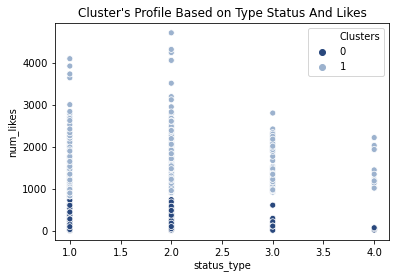

In [95]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["status_type"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Type Status And Likes")
plt.legend()
plt.show()

#### 8.7. Cluster's Profile Based on Likes And Hour

* We can see that the **sellers of the cluster 0 independetly of the hour, always have less likes than the sellers of cluster 1 during 15:00 - 20:00**

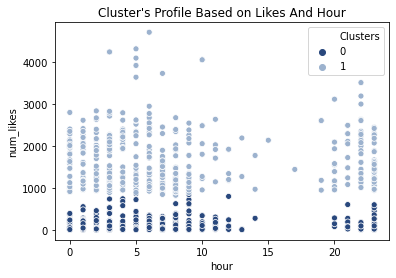

In [97]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Likes And Hour")
plt.legend()
plt.show()

#### 8.8. Cluster's Profile Based on Likes And Month

* Once again, **sellers of the cluster 0 independetly of the month, always have less likes than the sellers of cluster 1**

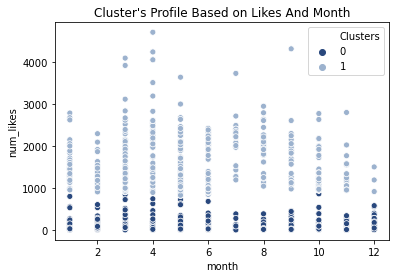

In [99]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["month"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Likes And Month")
plt.legend()
plt.show()

#### 8.9. Cluster's Profile Based on Interations And Likes

* We can see that the, **independently of the number of likes, when we have around 1000 likes is when we have the most amount of wows**

* There is **no much difference between the two clusters in this analysis, the number of hahas usually never passes the 30's**

* There is **no much of difference again, the number of sads is usually between 0 - 5**

* The **number of angrys never flutuate that much, is usually aroud 0 - 5**

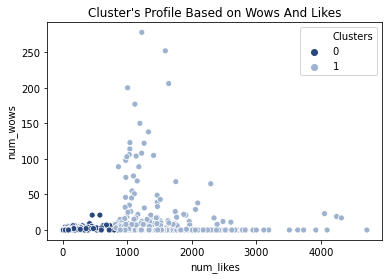

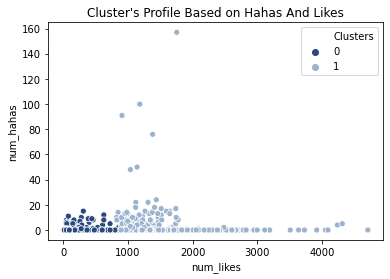

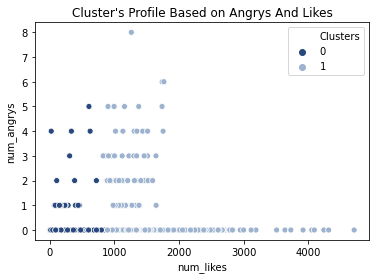

In [101]:
pl = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_wows"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Wows And Likes")
plt.legend()
plt.show()

pl2 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_hahas"], hue=df_us["Clusters"], palette= pal)
pl2.set_title("Cluster's Profile Based on Hahas And Likes")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_sads"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Sads And Likes")
plt.legend()
plt.show()

pl4 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_angrys"], hue=df_us["Clusters"], palette= pal)
pl4.set_title("Cluster's Profile Based on Angrys And Likes")
plt.legend()
plt.show()

#### 8.10. Cluster's Profile Based on Hour And Interations

* We can see that we always have **more interactions between 5:00 - 10:00**

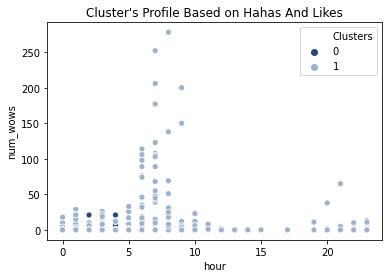

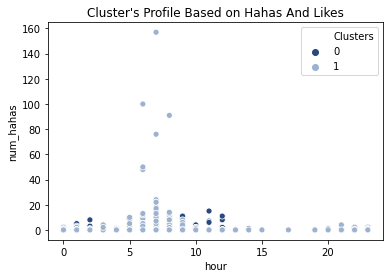

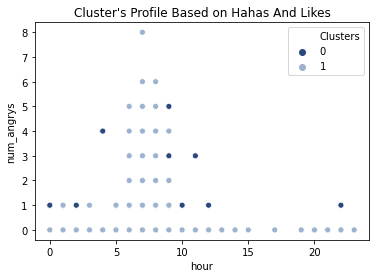

In [103]:
# hour x num_x
pl = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_wows"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Hour And Wows")
plt.legend()
plt.show()

pl2 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_hahas"], hue=df_us["Clusters"], palette= pal)
pl2.set_title("Cluster's Profile Based on Hour And Hahas")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_sads"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Hour And Sads")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_angrys"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Hour And Angrys")
plt.legend()
plt.show()

## 9. Conclusion
* Can be concluded that the **cluster 0 has seller that are in general less popular**. In the other hand, the **sellers of the cluster 1 have sellers that are super popular** 
* As we saw in the graph "Cluster's Profile Based on Shares And Likes", the **sellers from cluster 0 have less shares and less likes than the sellers of the cluster 1**
* In the following graph "Cluster's Profile Based on Type Status And Likes", the **sellers of the cluster 0 independetly of the status type, always have less likes than the sellers of cluster 1**
* In the graph "Cluster's Profile Based on Likes And Hour" we could concluded that once again the **sellers from cluster 1 have more likes than the sellers from cluster 0 independently of the hour of the day**
* But we can also conclude that during **15:00 - 20:00**, **isn't a good time to post because there is not much likes at this time of the day**
* Based on the graph "Cluster's Profile Based on Likes And Month" we could conclude that **there is not a month that have a lot more likes than the other and once again the sellers in the cluster 1, have more likes than the seller of cluster 0**
* In terms of number of interactions with the posts (wows, hahas, sads and angrys), the **number of likes doesn't influenciate that much**
* In terms of the hour of the post, can clearly be seen that between **5:00 - 10:00 there is more interactions than any other time of the day**